# **DATA CLEANING NOTEBOOK**

## Objectives

* Verify if values are missing in the dataset
* Handle missing values in dataset
* data cleaning

## Inputs

* dataset from data_collection that is stored under outputs/datasets/collection/house_prices.csv ("raw and uncleaned dataset from Kaggle")

## Outputs

* Cleaned data to be stored in output/datasets/cleaned 

## Conclusions drawn from this data cleaning step

* xxx 


---

# Change working directory

* Change of working directory from the current folder to its parent folder
* getcwd() = 'get current working directory'. This is access to the current directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5'

# Load Data

In [6]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/house_prices.csv")
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
5,796,566.0,1.0,No,732,GLQ,64,NaN,480,Unf,...,85.0,0.0,30,5,5,796,NaN,1993,1995,143000
6,1694,0.0,3.0,Av,1369,GLQ,317,NaN,636,RFn,...,75.0,186.0,57,5,8,1686,NaN,2004,2005,307000
7,1107,983.0,3.0,Mn,859,ALQ,216,NaN,484,NaN,...,NaN,240.0,204,6,7,1107,NaN,1973,1973,200000
8,1022,752.0,2.0,No,0,Unf,952,NaN,468,Unf,...,51.0,0.0,0,5,7,952,NaN,1931,1950,129900
9,1077,0.0,2.0,No,851,GLQ,140,NaN,205,RFn,...,50.0,0.0,4,6,5,991,NaN,1939,1950,118000


---

# Exploration of data

Head of the dataset suggests missing data (zero values) or undefined/missing values (NaN).
Variables/features that have missing values have to be determined.

* A total of nine variables have missing data as determined by len(variables_with_missing_data)
* Features 'EnclosedPorch' and 'WoodDeckSF' have substanial number of missing data of around 90% in dataset

In [7]:
variables_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
variables_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [8]:
len(variables_with_missing_data)

10

In [9]:
df[variables_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtExposure   1422 non-null   object 
 3   BsmtFinType1   1315 non-null   object 
 4   EnclosedPorch  136 non-null    float64
 5   GarageFinish   1225 non-null   object 
 6   GarageYrBlt    1379 non-null   float64
 7   LotFrontage    1201 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(3)
memory usage: 114.2+ KB


## Run a Profile Report for each variable with missing data

Use of ydata_profiling library class of ProfileReport to generate a profile report on missing values
Export of profile report into a Jupyter Notebook as an iframe


In [10]:
# This code was taken from walkthrough project 2 adjusted for my variable name for missing data
# This code is in the data cleaning notebook of walkthrough project 2
# ydata profiling was determined in requirements.txt in this forked repo

from ydata_profiling import ProfileReport

if variables_with_missing_data:
    profile = ProfileReport(df=df[variables_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

## Assessing Missing Data Levels

Missing data levels to be shown in a dataframe including absolute levels, relative levels and data type

---

In [11]:
## Evaluate MissingData funciton taken from walktrough project 2 from under the heading "Data Cleaning" and "Assessing Missing Data Levels"

def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data


In [12]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


NOTE

* Two features/variables ['EnclosedPorch', 'WoodDeckSF'] have each missing values of close to 90%
* Both features where missing values are close to 90% are numerical (sqf area). When value is missing this does likely suggest that EnclosedPorch or WoodDeck exists in the row of data for that specific house
* Imputation of values for these two features (such as using median or mean of those houses where data for EnclosedPorch or WoodDeckSF does exist) likely not appropriate
* Use of only 10PP of the dataset to "impute" 90PP of the dataset may lead to a subjective bias. Imputation of missing values would imply that either 'Porch' or 'WoodDeck' exist in certain sqf even if both features may not even exist for the specific houses in the row of features
* Review of features suggests that both variables ['EnclosedPorch', 'WoodDeckSF'] unlikely to contribute significantly to predictive power of house price

## Missing Data Processing


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


sns.set(style="whitegrid")

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):
    """
    Function to visualize data cleaning effect
    """
    flag_count = 1

    # Identify categorical variables
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    # Loop through each variable in the list provided
    for var in variables_applied_with_method:
        print("\n=====================================================================================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method on variable: {var}")

        if var in categorical_variables:
            # For categorical variables, create a bar plot
            df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]})
            df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]})
            dfAux = pd.concat([df1, df2], axis=0)
            dfAux.reset_index(drop=True, inplace=True)  # Reset the index to avoid duplicates

            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(data=dfAux, x="Value", hue="Type", palette=['#432371', "#FAAE7B"])
            axes.set_title(f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()
            plt.show()
            print(f"Displaying bar plot for categorical variable: {var}")

        else:
            # For numerical variables, create histograms
            fig, axes = plt.subplots(figsize=(10, 5))
            sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set_title(f"Distribution Plot {flag_count}: {var}")
            plt.legend()
            plt.show()
            print(f"Displaying histogram for numerical variable: {var}")

        plt.close(fig)
        flag_count += 1


## Split Train and Test Set
The data is divided into two parts: one part to train the model and the other to test it. 

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [14]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


Run the missing values again because now a train set and testset was created. 

In [15]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
print(df_missing_data)  # This will display the details about missing data in each column

print(f"TrainSet columns: {TrainSet.columns}")


* There are 10 variables with missing data 

               RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1056                90.41  float64
WoodDeckSF                    1034                88.53  float64
LotFrontage                    212                18.15  float64
GarageFinish                   184                15.75   object
BsmtFinType1                   114                 9.76   object
BedroomAbvGr                    80                 6.85  float64
2ndFlrSF                        60                 5.14  float64
GarageYrBlt                     58                 4.97  float64
BsmtExposure                    28                 2.40   object
MasVnrArea                       6                 0.51  float64
TrainSet columns: Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
 

## 1. Drop | remove variables

As per conclusion above, variables 'EnclosedPorch' and 'WoodDeckSF' should not be imputed given low percentage of observations to draw imputation from.

In [16]:
from feature_engine.selection import DropFeatures

variables_to_drop=['EnclosedPorch' , 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_to_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_to_drop:
    print(i in df_method.columns.to_list())

False
False


## 2. Mean Imputation

Mean imputation for continuous variable 'LotFrontage' keeps the imputed values with the range of values in Trainset where data is not missing. Same is true for 'BedroomAbvGr' with intervals (0,1,2,3,4..) where data exists in the Trainset. Using Mean Imputation keeps the 'BedroomAbvGr' within the range of Bedrooms observed in the Trainset where data exists.

Low share of outliers. As a result, outliers can not distort the mean value.

---


* Distribution Effect Analysis After Data Cleaning Method on variable: LotFrontage


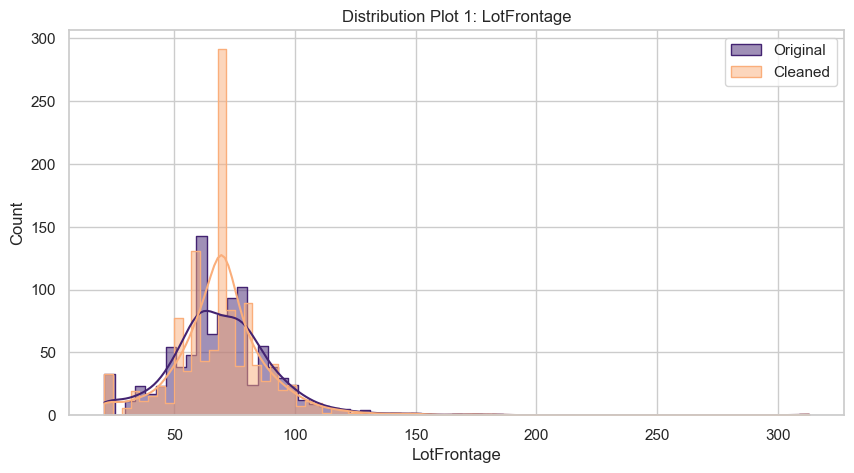

Displaying histogram for numerical variable: LotFrontage

* Distribution Effect Analysis After Data Cleaning Method on variable: BedroomAbvGr


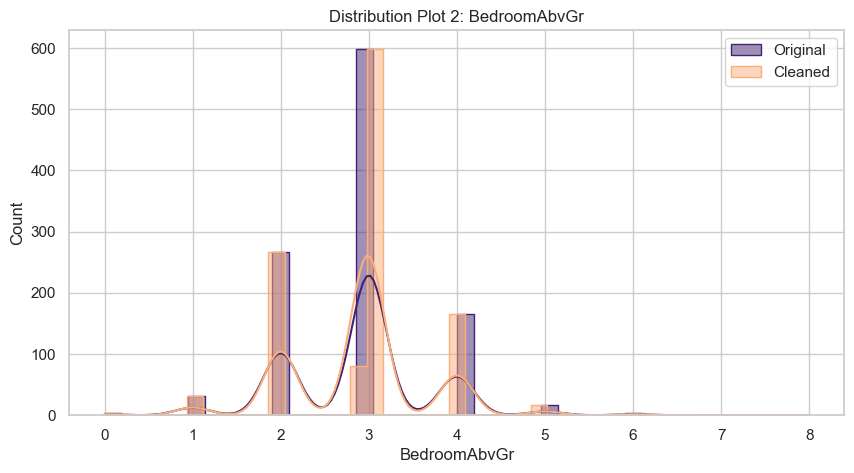

Displaying histogram for numerical variable: BedroomAbvGr


In [17]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['LotFrontage' , 'BedroomAbvGr']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_mean)

## 3. Median Imputation

Variables ['2ndFlrSF','MasVnrArea'] have strongly left-skewed data while ['GarageYrBlt'] is right-skewed.
Data is not normally distributed. 
['2ndFlrSF'] likewise has high proportion of zero values suggesting that 2ndFlrSF does not exist in that property.
['GarageYrBlt'] shows high proportion of garages built in "recent decades" (left skew in data)

For all of these variables, a mean imputation would lead to capturing outliers into the mean.
Hence, meadian imputation was tested and used to replace the missing values.

['GarageYrBlt'] with imputed median still leaves a left skew to the data. Year of garage build likely not
affecting overall sales price of property. Instead, size (in sqft) likely to have more meaningful impact on
sale price. Consider dropping the ['GarageYrBlt'] feature altogether as a result.



* Distribution Effect Analysis After Data Cleaning Method on variable: 2ndFlrSF


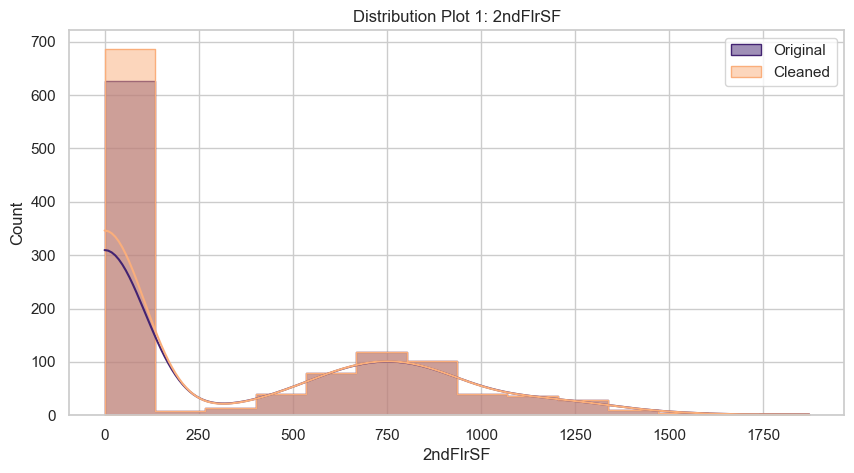

Displaying histogram for numerical variable: 2ndFlrSF

* Distribution Effect Analysis After Data Cleaning Method on variable: GarageYrBlt


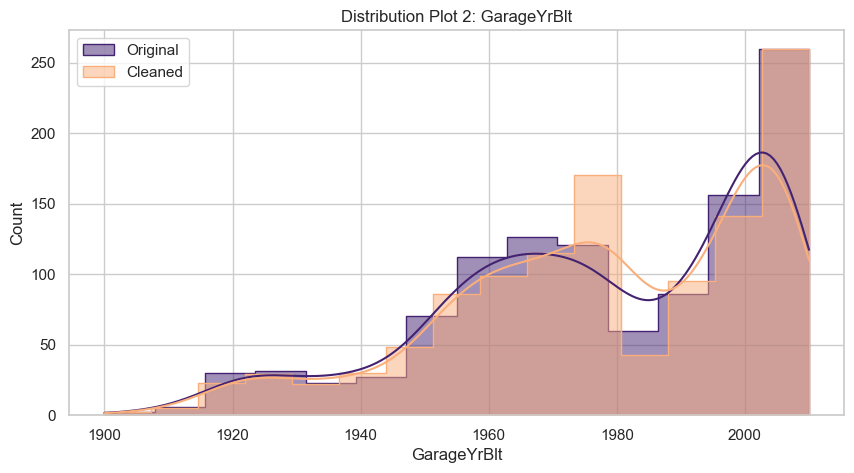

Displaying histogram for numerical variable: GarageYrBlt

* Distribution Effect Analysis After Data Cleaning Method on variable: MasVnrArea


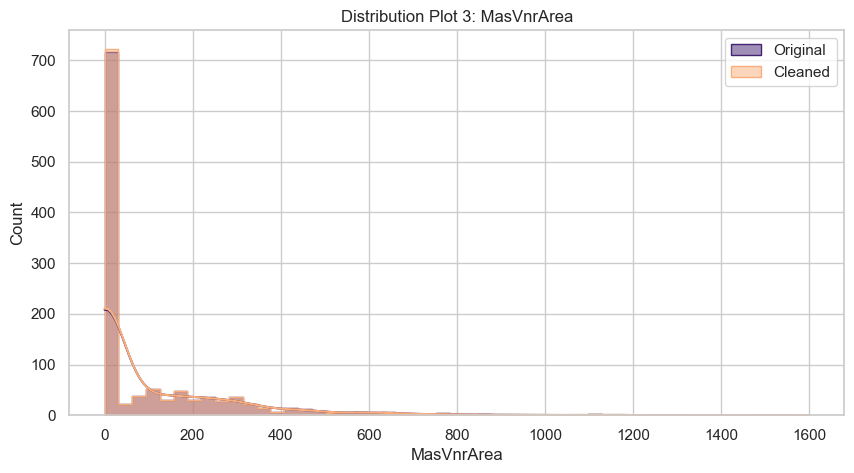

Displaying histogram for numerical variable: MasVnrArea


In [18]:
variables_median = ['2ndFlrSF' , 'GarageYrBlt', 'MasVnrArea']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_median)

## 4. Categorical Imputation

Variables ['GarageFinish','BsmtFinType1'] are categorical features of ordinal nature, i.e. there is a progressive order of quality level.

Missing data is imputed with placeholder value. Ensures that data observation (row) is maintained and not dropped because underlying feature my not exist in row of data (such as, for instance, GarageFinish, with missing data when a garage does not exist in the first place)




* Distribution Effect Analysis After Data Cleaning Method on variable: GarageFinish


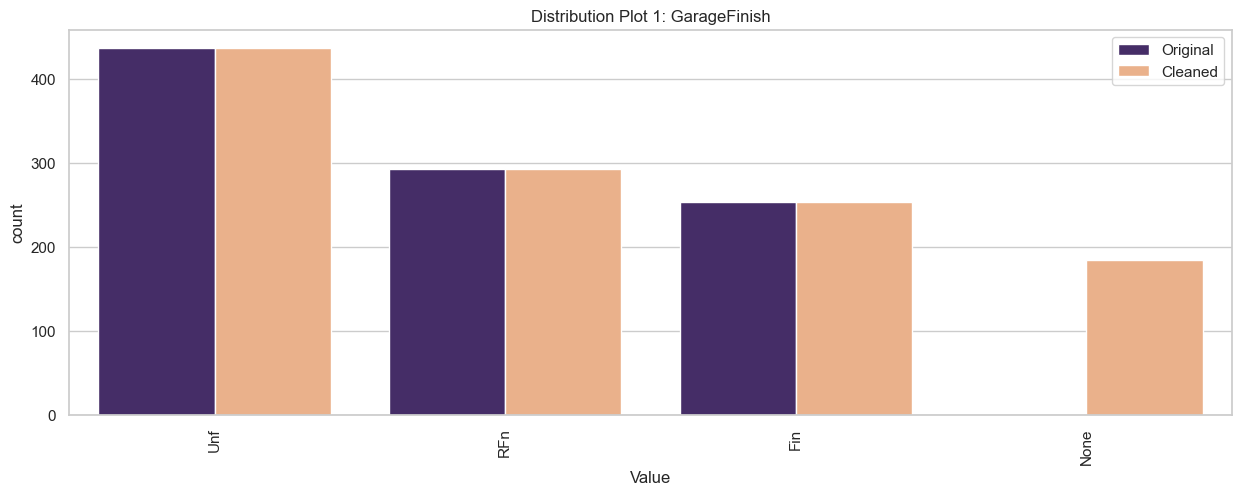

Displaying bar plot for categorical variable: GarageFinish

* Distribution Effect Analysis After Data Cleaning Method on variable: BsmtFinType1


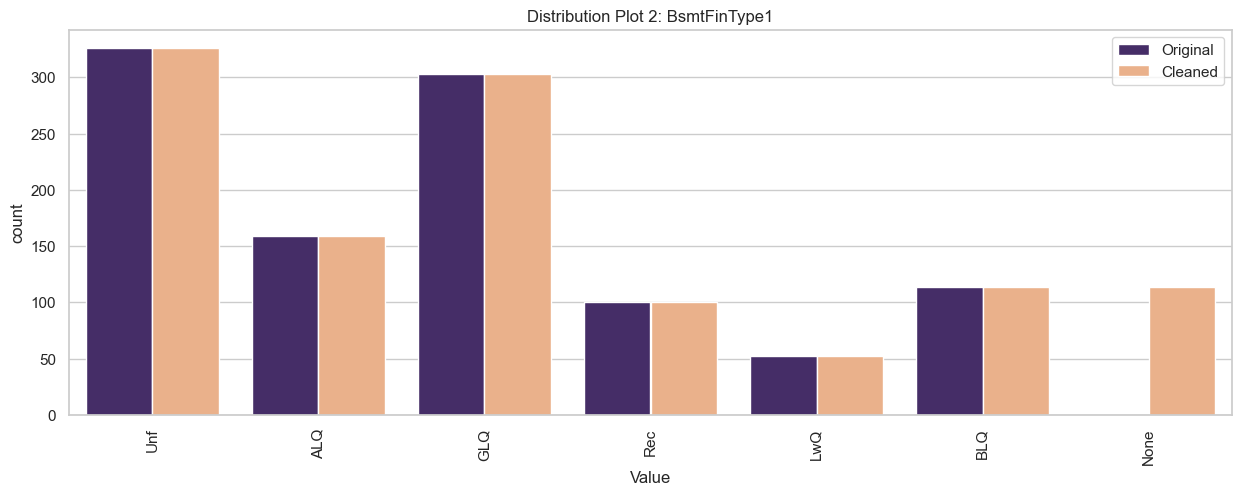

Displaying bar plot for categorical variable: BsmtFinType1


In [19]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)

## Pipeline for Data Cleaning

The analytical steps and conclusions from above are summarised in one dataCleaning_pipeline

In [20]:
from sklearn.pipeline import Pipeline

dataCleaning_pipeline = Pipeline([
      ( 'mean',  MeanMedianImputer(imputation_method='mean',
                                     variables=['LotFrontage' , 'BedroomAbvGr']) ),
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['2ndFlrSF', 'MasVnrArea']) ),
      ( 'categorical',  CategoricalImputer(imputation_method='missing',
                                     fill_value='None',
                                     variables=['GarageFinish' , 'BsmtFinType1', 'BsmtExposure']) ),
      ( 'drop',  DropFeatures(features_to_drop=['EnclosedPorch', 'GarageYrBlt', 'WoodDeckSF']) )
])

Pipeline of dataCleaning is applied to TrainSet and TestSet

In [21]:
TrainSet = dataCleaning_pipeline.fit_transform(TrainSet)
TestSet = dataCleaning_pipeline.transform(TestSet)


In [22]:
df = dataCleaning_pipeline.fit_transform(df)

In the three lines below, the EvaluateMissingData function is run on the three datasets that exist at this stage. It exists a TrainSet, it exists a TestSet and it exists the underlying dataset that was not split into Train/Test. Running the function named EvaluateMissingData shows that all missing data was either removed or imputed so that no missing data in either of the three datasets at this stage exists

In [23]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [24]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [25]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [26]:
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

## Train Set to Repo

In [27]:
TrainSet.to_csv("outputs/datasets/cleaned/train_set_cleaned.csv", index=False)

## Test Set to Repo

In [28]:
TestSet.to_csv("outputs/datasets/cleaned/test_set_cleaned.csv", index=False)

## Cleaned Dataset with no split into Train/Test

In [29]:
df.to_csv("outputs/datasets/cleaned/house_prices_cleaned.csv", index=False)